In [1]:
import matplotlib.pyplot as plt
import numpy as np

NUMERICAL RECIPES FOR ASTROPHYSICS - SPRING 2019
First hand-in exercise

Prob 1. Preparing routlines.
a) Poisson Distribution

Output with (lambda,k) = (1,0):
0.36787944117144233
Output with (lambda,k) = (5,10):
0.018132788707821874
Output with (lambda,k) = (3,20):
7.135378768777135e-11
Output with (lambda,k) = (2.6,40):
3.6151239949376895e-33

b) Random Number Generator

Seed set to 123456

Prob 2. Satellite galaxies.
a) Numerical integration

a = 2.0281186118094894
b = 1.5108214620664384
c = 3.3376429811225647
A = 0.009184394755105473

b) Log-log plot and interpolation

n(10**-4) = 0.001448432903441252
n(10**-2) = 0.16445648533478385
n(10**-1) = 1.7151796175717178
n(1) = 14.58237042844604
n(5) = 27.81182977389835


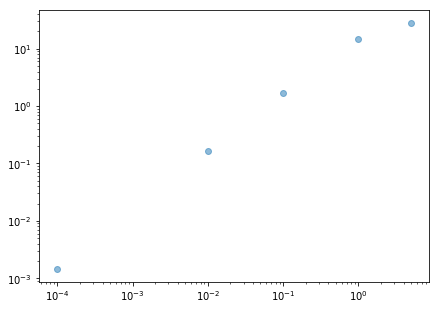

In [111]:
### NUMERICAL RECIPES FOR ASTROPHYSICS - SPRING 2019
### First hand-in exercise
print('NUMERICAL RECIPES FOR ASTROPHYSICS - SPRING 2019')
print('First hand-in exercise')
print()

# Prob 1. Preparing routlines.
print('Prob 1. Preparing routlines.')

# Part a) Poisson Distribution.
print('a) Poisson Distribution')
print()

# Factorial function. Raises ValueError if x is not integral or is negative.
def factorial(n):    
    fact = 1
    
    if n < 0:
        raise ValueError('factorial() not defined for negative values')
    
    elif type(n) == float:
        raise ValueError('factorial() only accepts integral values')
        
    # The factorial function is defined by the product.
    # n! = 1*2*3...*(n-2)*(n-1)*n
    else:
        for i in range (1,n+1):
            fact = fact * i
        
    return float(fact)

# Poisson probability distribution for integer k, given a positive mean lambda. 
def Poisson_probability_distribution(Lambda, k):
    Poisson = (Lambda**k)*(np.e**(-Lambda))/factorial(k)
    return Poisson

# Input values as required. 
Lambda = [1,5,3,2.6]
k = [0,10,20,40]

# Output results of the Poisson distribution.
[Poisson_probability_distribution(Lambda[i],k[i]) for i in range(len(k))]
for i in range(len(k)):
    print('Output with (lambda,k) = ('+str(Lambda[i])+','+str(k[i])+'):')
    print(Poisson_probability_distribution(Lambda[i],k[i]))


# Part b) Random Number Generator.
# All three methods from lecture slides are combined by applying 
# the input as the output of the previous method.
print()
print('b) Random Number Generator')
print()
 

# Set seed.
# Once during the entire iteration.
I0=123456
print('Seed set to '+str(I0))
print()

# (Multip.) Linear Congruential Generators. 
# Parameters acquired from lecture slides.
def lcg(I=I0, m=2**64-1, a=5667594924, c=1013904223):
    
    global I0
    I0 = (a*I0 + c) % m
    return I0

# Multiply with Carry (MWC) with base b = 2**32.
def mwc(a=4294957665):
    
    # Use the output of LCG as the input of MWC. 
    n = a*(lcg() & (2**32-1))+(lcg()>>32)
    return n

# 64-bit XOR-shift.
def xor_shift_64():
    
    # Use the output of MWC as the input of XOR-shift.
    X = mwc()
    Y = mwc()
    Z = mwc()
    W = mwc()
    
    # Parameters acquired from lecture notes. 
    a1 = 21
    a2 = 35
    a3 = 4
    bit64 = 0xffffffffffffffff
    
    t = X^(X<<a2) & bit64 # Keep in 64-bit.
    X = Y
    Y = Z
    Z = W
    W = W^(W>>a1)^t^(t>>a3) & bit64 # Keep in 64-bit.
    
    P = 2**64-1
    
    return W / P # Gernerate numbers between 0 and 1. 
'''
# Plot first 1000 numbers generated.
print('Plot 1000 sequential random numbers against each other.')
print()

# Create two empty arrays and append x_i and x_i+1 later.
x_i = []
x_i_plus_1 = []

# Append the 1000 random numbers to the array.
for i in range(1000):
    x_i.append(xor_shift_64())
    x_i_plus_1.append(xor_shift_64())
    
# Plot x_i vs x_i+1
plt.figure(figsize=(7,5))
plt.title('1000 sequential random numbers', fontsize=18)
plt.xlabel('x$_{\mathrm{i}}$', fontsize=16)
plt.ylabel('x$_{\mathrm{i+1}}$', fontsize=16)
plt.scatter(x_i, x_i_plus_1, alpha=0.5)

# Put 1000000 random numbers in 20 bins with 0.05 wide and plot them. 
print('Plot 1000000 random numbers in 20 bins 0.05 wide.')

# Create an empty array to append 1000000 numbers.
a_million = []

# Append the 1000000 random numbers.
for i in range(1000000):
    a_million.append(xor_shift_64())

# Bin and plot. 
plt.figure(figsize=(7,5))
plt.title('1,000,000 random numbers in 20 bins 0.05 wide', fontsize=18)
plt.xlabel('Bins', fontsize=16)
plt.ylabel('Numbers', fontsize=16)
plt.hist(a_million, bins=20, alpha=0.5, histtype='bar', ec='black')
'''

### Prob 2. Satellite galaxies.
print('Prob 2. Satellite galaxies.')

# Part a)
print('a) Numerical integration')
print()

# Generate random numbers as required.
a = (2.5-1.1)*xor_shift_64()+1.1
b = (2-0.5)*xor_shift_64()+0.5
c = (4-1.5)*xor_shift_64()+1.5
print('a = '+str(a))
print('b = '+str(b))
print('c = '+str(c))

# Since there doen't exist any theta or phi dependence,
# the 3D spherical intergral can be simplied to a 1D integral multiplied with 4pi.
# Cancel the constant Nsat on both sides and we have an integration equal to 1.
# A is then just 1/result. 

# Write out the density profile to be integrated.
density_profile = lambda x:4*np.pi*(x/b)**(a-3)*np.e**(-(x/b**c))*x**2
#density_profile = lambda x:1/((x/b)**(3-a))*1/(np.e**((x/b)**c))*x**2

# Since the lower bound is 0, the function becomes improper,
# and thus the midpoint rule is necessary in this integration. 

# Midpoint rule.
def midpoint(f, a, b, N):
    # f     ... function to be integrated
    # [a,b] ... integration interval
    # N     ... number steps(bigger the better but slower)
    h = float(b-a)/N
    output = 0
    for i in range(N):
        output += f((a+h/2.0)+i*h)
    output *= h
    return output

# Calculate A.
A = 1/midpoint(density_profile,0,5,100000)
print('A = '+str(A))
print()

# Part b)
print('b) Log-log plot and interpolation')
print()

# Write out n values with inputs required. 
print('n(10**-4) = '+str(density_profile(1.e-4)))
print('n(10**-2) = '+str(density_profile(1.e-2)))
print('n(10**-1) = '+str(density_profile(1.e-1)))
print('n(1) = '+str(density_profile(1)))
print('n(5) = '+str(density_profile(5)))

# Create lists for plotting. 
x_range = [1.e-4, 1.e-2, 1.e-1, 1, 5]
n_value = []

# Append values and plot.
for i in range(len(x_range)):
    n_value.append(density_profile(x_range[i]))
plt.figure(figsize=(7,5))
plt.xscale('log') # log scale for x
plt.yscale('log') # log scale for y
plt.scatter(x_range, n_value, alpha=0.5)